### Task description
    Today all people around the world are concerned because of pandemicand its fast spreadingaround the world.One of the most famous models is SIR (Susceptible, Infectious, Removed). Removed includes both immune and deceased individuals. Three following statements are the basis for mathematical model of pandemic  spreading. First,  the  number  of  susceptible  people  per  time  decreases  proportionally  to probability of susceptible and infectious individuals contact. Second, the number of removedpeople per time  is  proportional  to  the  number  of  infectious  individuals.  Third,  the  total  population  is  constant: S+I+R=const. Thus, let us consider the following system of ordinary differential equations:

$$
\begin{equation*}
\begin{cases}
\frac{dS}{dt} = - \beta \frac{SI}{N} \\
\frac{dI}{dt} = \beta \frac{SI}{N} - \gamma I \\
\frac{dR}{dt} = \gamma I \\
\end{cases}
\end{equation*}
$$

### Tasks for Week 1.
    1. Transform continuous version of system of nonlinear differential equations to discrete form.
    2. Solve the discrete-time form numerically.
    3. Try to fit manually (changing beta and gamma) any open-source COVID statistics (say, in Russia and the USA).
    4. How does the model perform on both data sets?ReferencesBastin, G. Lectures on mathematical modelling of biological systems (2018) https://perso.uclouvain.be/georges.bastin/lectures-bio.pdfRasmuson,  A.,  Andersson,  B.,  Olsson,  L.,  &  Andersson,  R.  (2014).  Mathematical  Modeling  in  Chemical Engineering. Cambridge: Cambridge University Press.

# Task 1: Transform continuous version of system of nonlinear differential equations to discrete form.
First of all, we used Euler's method to transform continuous-time set of nonlinear equations to discrete one (i - iteration number, time moment etc...):
$$
\begin{equation*}
\begin{cases}
\frac{dS}{dt} = - \beta \frac{SI}{N} \\
\frac{dI}{dt} = \beta \frac{SI}{N} - \gamma I \\
\frac{dR}{dt} = \gamma I \\
\end{cases}
\Rightarrow
\begin{cases}
\frac{S_{i+1}-S_{i}}{t_{i+1}-t_{i}} = - \beta \frac{S_{i} I_{i}}{N} \\
\frac{I_{i+1}-I_{i}}{t_{i+1}-t_{i}} = \beta \frac{S_{i} I_{i}}{N} - \gamma I_{i} \\
\frac{R_{i+1}-R_{i}}{t_{i+1}-t_{i}} = \gamma I_{i} \\
\end{cases}
\end{equation*}
\text{, where}
$$

$S$ - the number of people who could become infected;

$I$ - infectious - the number of infected people;

$R$ - deleted - number of unresponsive and dead people.


$\beta$ is the effective contact rate of the disease: proportional coeffitient between probability of susceptible and infectious individuals contact.

$\gamma$ is the removing rate: the number of removedpeople per time  is  proportional  to  the  number  of  infectious  individuals.

# Task 2: Solve the discrete-time form numerically.
Then we tried to solve it numerically using reference data from the Internet. Parameters were chosen in a following way: $\beta = 0.2$ and $\gamma = 0.1$, 250 disctete time moments. As reference for the result we used a code from the following link https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

The result has been normalized to 1 (1 is an amount of individuals in the population).

Populating the interactive namespace from numpy and matplotlib


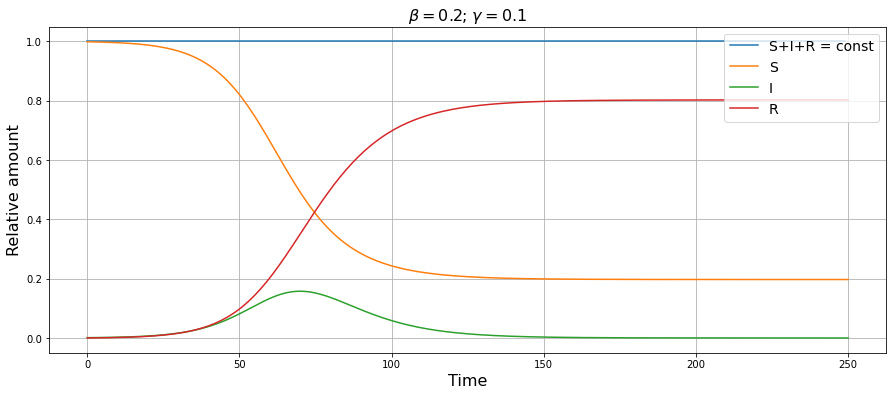

In [1]:
%pylab inline

N = 1000 # total amount of people (S+I+R = const)
beta, gamma = 0.2, 0.1
duration = 250

S0 = N - 1 # suspected (at least 1 infected)
I0 = N - S0 # infected
R0 = 0 # immune + dead

SIR = [[],[],[],[]] # to collect statistics
# add initial conditions
SIR[0].append(S0)
SIR[1].append(I0)
SIR[2].append(R0)
# initialize conditions
S,I,R = S0,I0,R0
# solve equation several times
for t in range(duration):
    # calculate all equations simultaniously
    S,I,R = S - beta*S*I/N, I + beta*S*I/N - gamma*I, R + gamma*I
    
    # collect t-th iteration statistics
    SIR[0].append(S)
    SIR[1].append(I)
    SIR[2].append(R)
    SIR[3].append(S+I+R) # to be sure if total population is contant

# graph settings
figure(figsize=(15,6))
title('$\\beta = $' + str(beta) + '; ' + '$\\gamma = $' + str(gamma), fontsize=16)
plot(np.array(SIR[3])/N, label = 'S+I+R = const')
plot(np.array(SIR[0])/N, label = 'S')
plot(np.array(SIR[1])/N, label = 'I')
plot(np.array(SIR[2])/N, label = 'R')
xlabel('Time',fontsize=16)
ylabel('Relative amount',fontsize=16)
legend(loc='upper right',fontsize=14)
grid()

# Task 3: Try to fit manually (changing beta and gamma) any open-source COVID statistics (say, in Russia and the USA).
The statistic regarding Russia and USA was taken from the open web-source "https://russian-trade.com/coronavirus/". The point is that it was lead the complete sum statistic with accumulation from day to day. We differentiate this statistic and got total statistic not for all previous days (as it was initially in these tables), but for each seperate day. After that it was created dependences Time - Infected cases and Time  -  (Dead + Cure) cases. According to these dependences  all further fitting was performed.

Using the data from the open sources and shaping the csv. files from this statistic made this fitting pretty convenient for further operation in library "pandas"

Initially, the useful function 'get_graph' was written to make manual fitting process more convinient in all further fitting procedures.

In [2]:
lw = 4 # linewidth
fs = 20 # fontsize

def get_graph(beta,gamma,duration):
    N = 1000 # total amount of people (S+I+R = const)

    S0 = N - 1 # suspected (at least 1 infected)
    I0 = N - S0 # infected
    R0 = 0 # immune + dead

    SIR = [[],[],[],[]] # to collect statistics
    # add initial conditions
    SIR[0].append(S0)
    SIR[1].append(I0)
    SIR[2].append(R0)
    # initialize conditions
    S,I,R = S0,I0,R0
    # solve equation several times
    for t in range(duration):
        # calculate all equations simultaniously
        S,I,R = S - beta*S*I/N, I + beta*S*I/N - gamma*I, R + gamma*I

        # collect t-th iteration statistics
        SIR[0].append(S)
        SIR[1].append(I)
        SIR[2].append(R)
        SIR[3].append(S+I+R) # to be sure if total population is contant
    return SIR

def estimate_metric(x_real,x_estimated):
    e = np.sqrt(np.mean((x_real-x_estimated)**2))
    return e

## Infected people from Russia an USA fitting

Text(410, 0.8, '$\\gamma=$0.015')

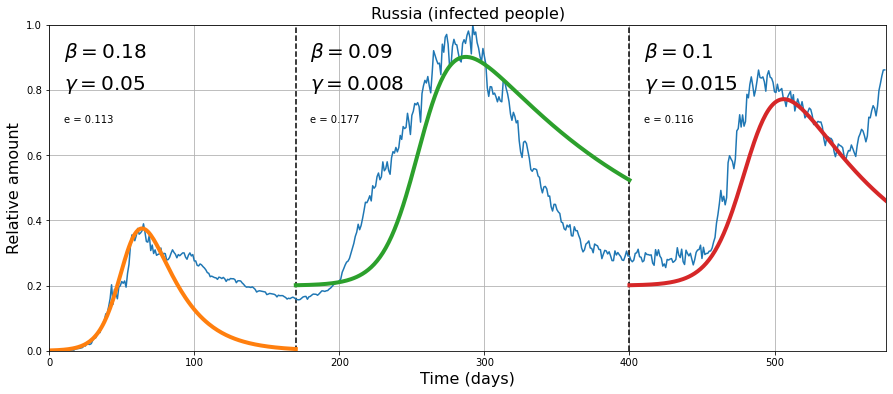

In [3]:
import pandas as pd

df_Rus_Inf = pd.read_csv('russia_All_waves_I.csv')
DATA = np.array(df_Rus_Inf['7']/max(df_Rus_Inf['7']))

figure(figsize=(15,6))
title('Russia (infected people)', fontsize=16)
plot(df_Rus_Inf['7']/max(df_Rus_Inf['7'])) # normalization
beta1,gamma1,bias1  = 0.18,0.05,0
SIR = get_graph(beta=beta1,gamma=gamma1,duration=170)
m1 = text(10,0.7,'e = '+ str(round(estimate_metric(DATA[0:171],np.array(SIR[1])/N + bias1),3)))
plot(np.arange(171),np.array(SIR[1])/N+bias1, label = 'I',linewidth=lw)
vlines(170,0,1,'k','--')
beta2,gamma2,bias2 = 0.09,0.008,0.2
SIR = get_graph(beta=beta2,gamma=gamma2,duration=230)
m2 = text(180,0.7,'e = '+ str(round(estimate_metric(DATA[170:401],np.array(SIR[1])/N + bias2),3)))
plot(np.arange(231)+170,np.array(SIR[1])/N+bias2, label = 'I',linewidth=lw)
vlines(170+230,0,1,'k','--')
beta3,gamma3,bias3 = 0.1,0.015,0.2
SIR = get_graph(beta=beta3,gamma=gamma3,duration=177)
m3 = text(410,0.7,'e = '+ str(round(estimate_metric(DATA[399:],np.array(SIR[1])/N + bias3),3)))
plot(np.arange(178)+400,np.array(SIR[1])/N+bias3, label = 'I',linewidth=lw)
xlabel('Time (days)',fontsize=16)
ylabel('Relative amount',fontsize=16)
xlim(0,len(df_Rus_Inf))
ylim(0,1)
grid()

# to plot betas and gammas
text(10,0.9, '$\\beta=$' + str(beta1),fontsize=fs)
text(10,0.8, '$\\gamma=$' + str(gamma1),fontsize=fs)
text(180,0.9, '$\\beta=$' + str(beta2),fontsize=fs)
text(180,0.8, '$\\gamma=$' + str(gamma2),fontsize=fs)
text(410,0.9, '$\\beta=$' + str(beta3),fontsize=fs)
text(410,0.8, '$\\gamma=$' + str(gamma3),fontsize=fs)

### We suppose that for a bigger wave $\beta$ value decreases since the probability of the contact between infected and non-infected people decreases.

Text(510, 0.8, '$\\gamma=$0.045')

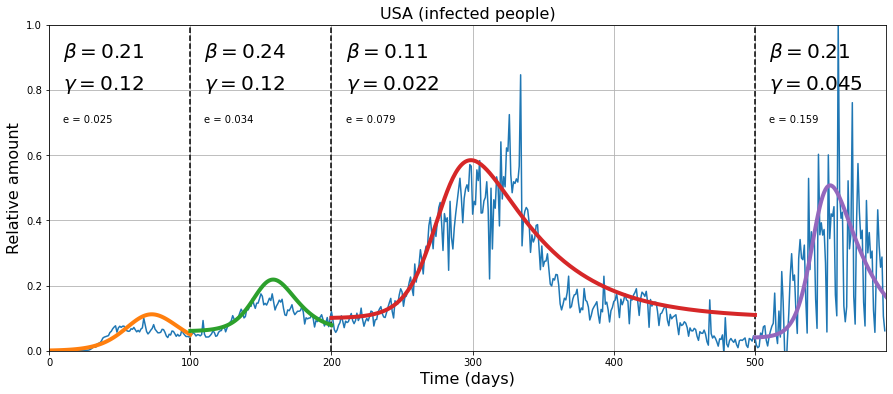

In [4]:
df_USA_Inf = pd.read_csv('USA_Infected.csv')
DATA = np.array(df_USA_Inf['15']/max(df_USA_Inf['15']))

figure(figsize=(15,6))
title('USA (infected people)', fontsize=16)
plot(df_USA_Inf['15']/max(df_USA_Inf['15'])) # normalization
beta1,gamma1,bias1 = 0.21,0.12,0
SIR = get_graph(beta=beta1,gamma=gamma1,duration=100)
m1 = text(10,0.7,'e = '+ str(round(estimate_metric(DATA[0:101],np.array(SIR[1])/N + bias1),3)))
plot(np.arange(101),np.array(SIR[1])/N, label = 'I',linewidth=lw)
vlines(100,0,1,'k','--')
beta2,gamma2,bias2 = 0.24,0.12,0.06
SIR = get_graph(beta=beta2,gamma=gamma2,duration=100)
m2 = text(110,0.7,'e = '+ str(round(estimate_metric(DATA[100:201],np.array(SIR[1])/N + bias2),3)))
plot(np.arange(101)+100,np.array(SIR[1])/N+bias2, label = 'I',linewidth=lw)
vlines(200,0,1,'k','--')
beta3,gamma3,bias3 = 0.11,0.022,0.1
SIR = get_graph(beta=beta3,gamma=gamma3,duration=300)
m3 = text(210,0.7,'e = '+ str(round(estimate_metric(DATA[200:501],np.array(SIR[1])/N + bias3),3)))
plot(np.arange(301)+200,np.array(SIR[1])/N+bias3, label = 'I',linewidth=lw)
vlines(500,0,1,'k','--')
beta4,gamma4,bias4 = 0.21,0.045,0.04
SIR = get_graph(beta=beta4,gamma=gamma4,duration=93)
m4 = text(510,0.7,'e = '+ str(round(estimate_metric(DATA[499:],np.array(SIR[1])/N + bias4),3)))
plot(np.arange(94)+500,np.array(SIR[1])/N+bias4, label = 'I',linewidth=lw)
xlabel('Time (days)',fontsize=16)
ylabel('Relative amount',fontsize=16)
xlim(0,len(df_USA_Inf))
ylim(0,1)
grid()

# to plot betas and gammas
text(10,0.9, '$\\beta=$' + str(beta1),fontsize=fs)
text(10,0.8, '$\\gamma=$' + str(gamma1),fontsize=fs)
text(110,0.9, '$\\beta=$' + str(beta2),fontsize=fs)
text(110,0.8, '$\\gamma=$' + str(gamma2),fontsize=fs)
text(210,0.9, '$\\beta=$' + str(beta3),fontsize=fs)
text(210,0.8, '$\\gamma=$' + str(gamma3),fontsize=fs)
text(510,0.9, '$\\beta=$' + str(beta4),fontsize=fs)
text(510,0.8, '$\\gamma=$' + str(gamma4),fontsize=fs)

### We suppose that for a bigger wave $\beta$ value decreases since the probability of the contact between infected and non-infected people decreases.

## Removed (dead and imuune individuals) people from Russia an USA fitting
We suggest, that the view of the graph "R" that was illustrated https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/ doesn't match to the  real status of the pandemic situation,because of the initial stage of the pandemic distribution doesn't cover all world's population and the current model doesn't count the possibility to be infected several times. Overall that makes  the plateau unattainable, until all population of the world infected.

Text(410, 0.8, '$\\gamma=$0.01')

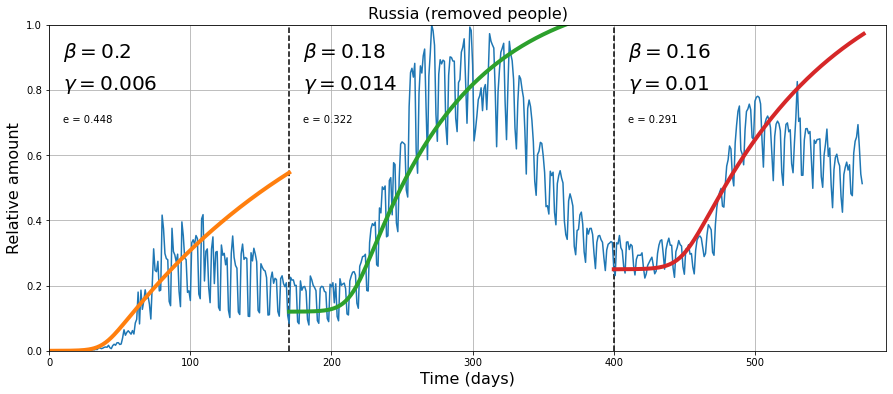

In [5]:
df_RUS_R = pd.read_csv('Russia_R.csv')
DATA = np.array(df_RUS_R['1']/max(df_RUS_R['1']))

figure(figsize=(15,6))
title('Russia (removed people)', fontsize=16)
plot(df_RUS_R['1']/max(df_RUS_R['1'])) # normalization
beta1,gamma1,bias1 = 0.2,0.006,0
SIR = get_graph(beta=beta1,gamma=gamma1,duration=170)
m1 = text(10,0.7,'e = '+ str(round(estimate_metric(DATA[0:171],np.array(SIR[1])/N + bias1),3)))
plot(np.arange(171),np.array(SIR[2])/N + bias1, label = 'I',linewidth=lw)
vlines(170,0,1,'k','--')
beta2,gamma2,bias2 = 0.18,0.014,0.12
SIR = get_graph(beta=beta2,gamma=gamma2,duration=230)
m2 = text(180,0.7,'e = '+ str(round(estimate_metric(DATA[170:401],np.array(SIR[1])/N + bias2),3)))
plot(np.arange(231)+170,np.array(SIR[2])/N+bias2, label = 'I',linewidth=lw)
vlines(170+230,0,1,'k','--')
beta3,gamma3,bias3 = 0.16,0.01,0.25
SIR = get_graph(beta=beta3,gamma=gamma3,duration=177)
m3 = text(410,0.7,'e = '+ str(round(estimate_metric(DATA[399:577],np.array(SIR[1])/N + bias3),3)))
plot(np.arange(178)+400,np.array(SIR[2])/N+bias3, label = 'I',linewidth=lw)
xlabel('Time (days)',fontsize=16)
ylabel('Relative amount',fontsize=16)
xlim(0,len(df_USA_Inf))
ylim(0,1)
grid()

# to plot betas and gammas
text(10,0.9, '$\\beta=$' + str(beta1),fontsize=fs)
text(10,0.8, '$\\gamma=$' + str(gamma1),fontsize=fs)
text(180,0.9, '$\\beta=$' + str(beta2),fontsize=fs)
text(180,0.8, '$\\gamma=$' + str(gamma2),fontsize=fs)
text(410,0.9, '$\\beta=$' + str(beta3),fontsize=fs)
text(410,0.8, '$\\gamma=$' + str(gamma3),fontsize=fs)

### It can be seen that $\gamma$ parameter has a value directly correlating with the amplitude of the wave: higher wave - higher $\gamma$ value.

Text(510, 0.8, '$\\gamma=$0.07')

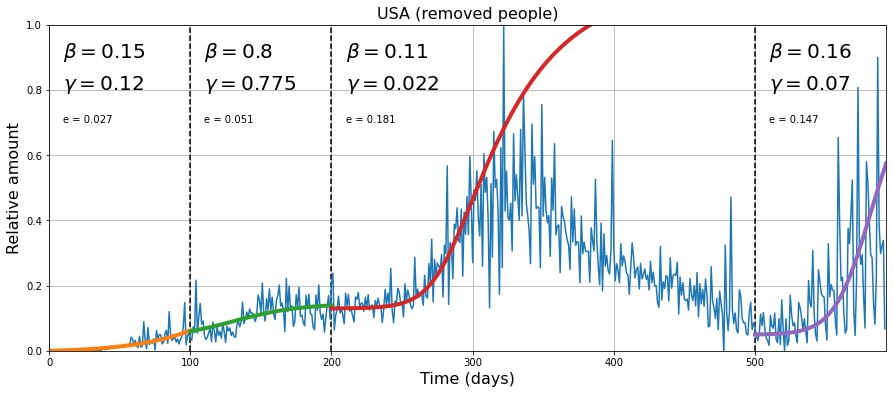

In [6]:
df_USA_R = pd.read_csv('USA_R_Corrected.csv')
DATA = np.array(df_USA_R['3']/max(df_USA_R['3']))

figure(figsize=(15,6))
title('USA (removed people)', fontsize=16)
plot(df_USA_R['3']/max(df_USA_R['3'])) # normalization
beta1,gamma1 = 0.15,0.12
SIR = get_graph(beta=beta1,gamma=gamma1,duration=100)
m1 = text(10,0.7,'e = '+ str(round(estimate_metric(DATA[0:101],np.array(SIR[1])/N + bias1),3)))
plot(np.arange(101),np.array(SIR[2])/N, label = 'I',linewidth=lw)
vlines(100,0,1,'k','--')
beta2,gamma2 = 0.8,0.775# 0.65,0.63
SIR = get_graph(beta=beta2,gamma=gamma2,duration=100)
m2 = text(110,0.7,'e = '+ str(round(estimate_metric(DATA[100:201],np.array(SIR[1])/N + bias2),3)))
plot(np.arange(101)+100,np.array(SIR[2])/N+0.06, label = 'I',linewidth=lw)
vlines(200,0,1,'k','--')
beta3,gamma3 = 0.11,0.022
SIR = get_graph(beta=beta3,gamma=gamma3,duration=300)
m3 = text(210,0.7,'e = '+ str(round(estimate_metric(DATA[200:501],np.array(SIR[1])/N + bias3),3)))
plot(np.arange(301)+200,np.array(SIR[2])/N+0.13, label = 'I',linewidth=lw)
vlines(500,0,1,'k','--')
beta4,gamma4 = 0.16,0.07
SIR = get_graph(beta=beta4,gamma=gamma4,duration=93)
m4 = text(510,0.7,'e = '+ str(round(estimate_metric(DATA[499:593],np.array(SIR[1])/N + bias4),3)))
plot(np.arange(94)+500,np.array(SIR[2])/N+0.05, label = 'I',linewidth=lw)
xlabel('Time (days)',fontsize=16)
ylabel('Relative amount',fontsize=16)
xlim(0,len(df_USA_Inf))
ylim(0,1)
grid()

# to plot betas and gammas
text(10,0.9, '$\\beta=$' + str(beta1),fontsize=fs)
text(10,0.8, '$\\gamma=$' + str(gamma1),fontsize=fs)
text(110,0.9, '$\\beta=$' + str(beta2),fontsize=fs)
text(110,0.8, '$\\gamma=$' + str(gamma2),fontsize=fs)
text(210,0.9, '$\\beta=$' + str(beta3),fontsize=fs)
text(210,0.8, '$\\gamma=$' + str(gamma3),fontsize=fs)
text(510,0.9, '$\\beta=$' + str(beta4),fontsize=fs)
text(510,0.8, '$\\gamma=$' + str(gamma4),fontsize=fs)

### But in this case we could not notice any correlations between wave properties and $\gamma$ value.

# Task 4: How does the model perform on both data sets?
So, as it possible to see from these graphs, the SIR model better match to the USA statistics ( it's possible to see, that the "dome" of the line is better compatible  in case of USA in comparison with Russia). We relate this tendency with the fact, that in USA all pandemic totally obey to the conception of "Waves", while for Russia the acceleration in infected cases happened gradually and every new Wave started from more high level that previous one; that means that the "dome" of the line will not match completely to the graph.
    
This model could be improved (to better fits reality) by following ways:

* 1) to consider vaccination effects;
    
* 2) to consider a latent period (when  individuals  are  already  infected  by  the pathogens but not yet infectious);
    
* 3) to consider time-varying parameters;
    
* 4) to consider additional parameters to describe the specific rate of immunity loss;

* 5) to consider the possibility to be infected several times.

It's possible to notice that within the whole pandemic time-range there are no exact tendencies between parameters from one wave to another, but the difference of the magnitudes of these parameters within one waves the good identification about the scale of the particular wave. For instance: in cases where the difference of parameters is small, the scale of the wave is small too and vice versa.